# EDA Restaurant Reviews


Using Python 3.13

Using this for an inital look at the data and to play around with it.
We can grab more datasets too

In [23]:
from text_data_toolkit import data_cleaning as clean
from text_data_toolkit import data_transformation as transform
from text_data_toolkit import eda

Space for File Operations


# Here lies an example of the data cleaning modules


In [43]:
files = ['../data/Restaurant_Reviews_Test.tsv',
         '../data/Restaurant_Reviews.csv',
         '../data/Restaurant_Reviews2.txt']


dfs = clean.load_text_to_df(files, columns = ["Review", "Like"], line_length = 2)

In [27]:
df_csv = dfs['Restaurant_Reviews']
df_csv.head()

,Review,Like
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [33]:
df_txt = dfs['Restaurant_Reviews2']
df_txt = df_txt.drop(0)
df_txt.head()

,Review,Like
1,Wow... Loved this place.,1
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday of...,1
5,The selection on the menu was great and so wer...,1


In [49]:
df_tsv = clean.homogenize_columns(df_tsv)

AttributeError: module 'text_data_toolkit.data_cleaning' has no attribute 'homogenize_columns'

In [44]:
df_tsv = dfs['Restaurant_Reviews_Test']
df_tsv.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust is not good .,0.0
2,Wow... Loved this place.,1.0
3,"""""""""",NaN
4,Not tasty and the texture was just nasty.,0.0


In [45]:
# Remove Duplicates
df_tsv_remove_dup = clean.remove_duplicates_fuzzy(df_tsv, "Review", threshold = 90)
df_tsv_remove_dup.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust is not good .,0.0
2,"""""""""",NaN
3,Not tasty and the texture was just nasty.,0.0
4,Stopped by during the late May bank holiday of...,1.0


In [46]:
# Normalize the Text (Lowercase & Remove Punctuation, Remove Whitespaces)
df_tsv_norm = clean.normalize_text(df_tsv_remove_dup, "Review")
df_tsv_norm.head()

,Review,Like
0,wow loved this place,1.0
1,crust is not good,0.0
2,,NaN
3,not tasty and the texture was just nasty,0.0
4,stopped by during the late may bank holiday of...,1.0


In [47]:
# Handle Missing Values
df_tsv_na = clean.handle_missing_values(df_tsv, "Review")
df_tsv_na.head()

,Review,Like
0,wow loved this place,1.0
1,crust is not good,0.0
2,not tasty and the texture was just nasty,0.0
3,stopped by during the late may bank holiday of...,1.0
4,the selection on the menu was great and so wer...,1.0


In [48]:
# Original Text Data to demonstrate Mass Cleaning Function
df_test = clean.load_text_to_df(['../data/Restaurant_Reviews_Test.tsv'],
                            columns =["Review", "Like"], line_length = 0)
df_tsv_dirty = df_test['Restaurant_Reviews_Test']
df_tsv_dirty.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust is not good .,0.0
2,Wow... Loved this place.,1.0
3,"""""""""",NaN
4,Not tasty and the texture was just nasty.,0.0


In [11]:
# Mass Cleaning FUnction (Remove Duplicates, Normalize, Handle Missing Values)
cleaned_df_tsv = clean.clean_dataframe(df_tsv_dirty, "Review")
cleaned_df_tsv.head()

,Review,Like
0,wow loved this place,1.0
1,crust is not good,0.0
2,not tasty and the texture was just nasty,0.0
3,stopped by during the late may bank holiday of...,1.0
4,the selection on the menu was great and so wer...,1.0


# Here lies examples of the data transformation modules


In [12]:
# Tokenize Dataframe Example
cleaned_df_tsv_tokenized = transform.tokenize_dataframe(cleaned_df_tsv, "Review")
cleaned_df_tsv_tokenized.head()

,Review,Like,Tokenized Text
0,wow loved this place,1.0,"wow, loved, this, place"
1,crust is not good,0.0,"crust, is, not, good"
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty"
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol..."
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and..."


In [13]:
# Remove Stopwords Example
cleaned_df_tsv_stopword = transform.remove_stopwords(cleaned_df_tsv_tokenized, "Review", custom_stopword = None, new_column = "Review No Stopwords")

cleaned_df_tsv_stopword.head()

,Review,Like,Tokenized Text,Review No Stopwords
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place
1,crust is not good,0.0,"crust, is, not, good",crust not good
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices


In [14]:
# Label Data Sentiment Example

cleaned_df_tsv_labeled = transform.label_data_sentiment(cleaned_df_tsv_stopword, "Review", new_column = "Review Sentiment")

cleaned_df_tsv_labeled.head()

,Review,Like,Tokenized Text,Review No Stopwords,Review Sentiment
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place,Neutral
1,crust is not good,0.0,"crust, is, not, good",crust not good,Positive
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty,Neutral
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...,Neutral
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices,Positive


# Here lies some EDA Transformation Examples


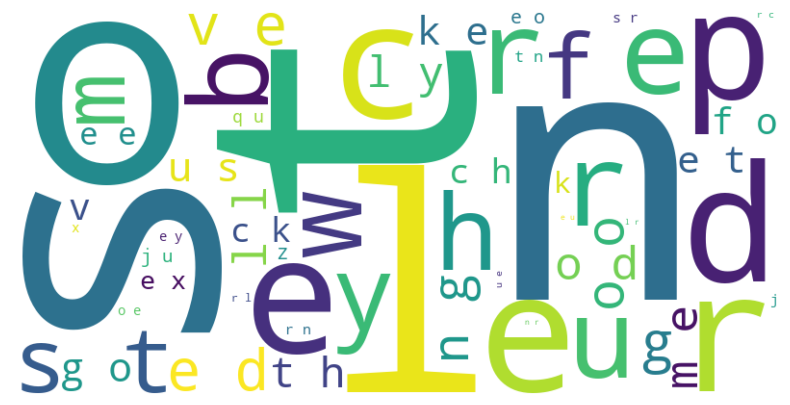

In [15]:
# Generate Wordcloud of No Stopwords Series

cleaned_df_tsv_labeled_wordcloud = eda.generate_wordcloud(cleaned_df_tsv_labeled["Review No Stopwords"].str.join(', '), custom_stopwords=["will", "some", "came"])

In [20]:
# Summary Statistics of our Text Data
eda.text_summary_stats(cleaned_df_tsv_stopword, "Review No Stopwords")

{'document_stats': {'total_docs': 197, 'empty_docs': 0, 'unique_docs': 197},
 'length_stats': {'min_length': 4,
  'max_length': 111,
  'total_length': 8415,
  'char_count_mean': 42.71573604060914,
  'char_count_median': 35},
 'word_stats': {'avg_words_per_doc': 6.8274111675126905,
  'total_words': 1345,
  'unique_words': 745,
  'avg_word_length': 5.402973977695167},
 'frequent_words': {'food': 27,
  'good': 25,
  'place': 21,
  'not': 21,
  'like': 17,
  'service': 16,
  'great': 15,
  'very': 13,
  'really': 12,
  'time': 10}}

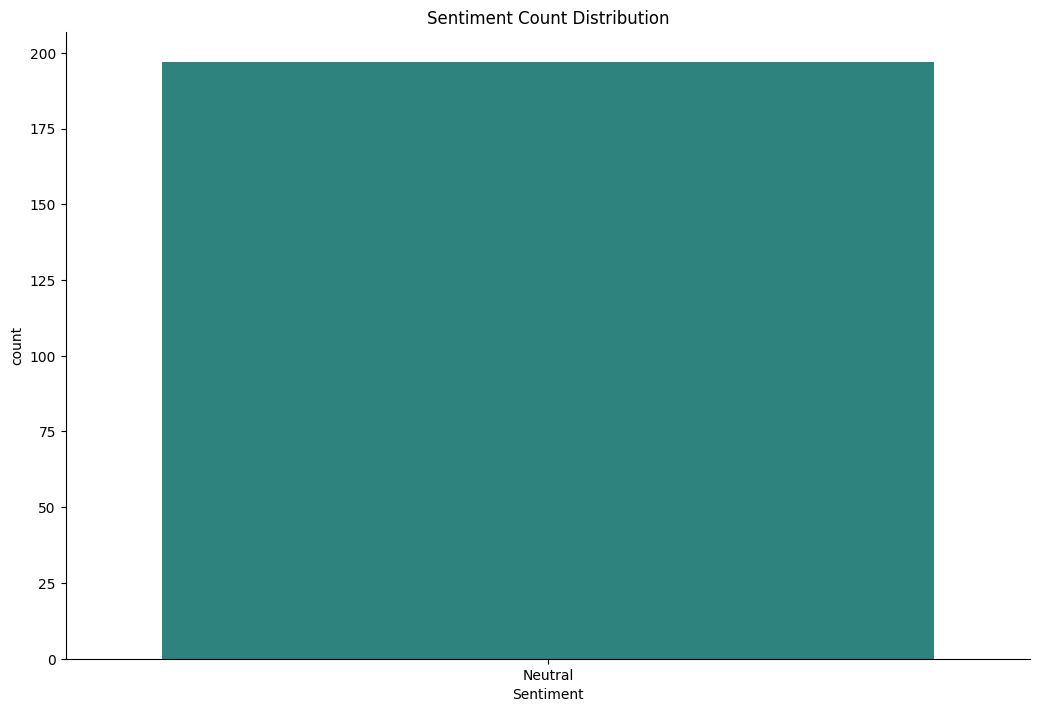

,Review,Like,Tokenized Text,Review No Stopwords,Review Sentiment,Review No Stopwords String,Sentiment
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place,neutral,w o w l o v e d p l a c e,Neutral
1,crust is not good,0.0,"crust, is, not, good",crust not good,positive,c r u s t n o t g o o d,Neutral
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty,neutral,n o t t a s t y t e x t u r e j u s t n a s t y,Neutral
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...,neutral,s t o p p e d d u r i n g l a t e m a y b a n ...,Neutral
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices,positive,s e l e c t i o n m e n u g r e a t p r i c e s,Neutral
...,...,...,...,...,...,...,...
192,when my order arrived one of the gyros was mis...,0.0,"when, my, order, arrived, one, of, the, gyros,...",order arrived one gyros missing,neutral,o r d e r a r r i v e d o n e g y r o s m i s ...,Neutral
193,i had a salad with the wings and some ice crea...,1.0,"i, had, a, salad, with, the, wings, and, some,...",salad wings some ice cream dessert left feelin...,neutral,s a l a d w i n g s s o m e i c e c r e a m d ...,Neutral
194,im not really sure how joeys was voted best ho...,0.0,"im, not, really, sure, how, joeys, was, voted,...",im not really sure joeys voted best hot dog va...,neutral,i m n o t r e a l l y s u r e j o e y s v o t ...,Neutral
195,the best place to go for a tasty bowl of pho,1.0,"the, best, place, to, go, for, a, tasty, bowl,...",best place go tasty bowl pho,neutral,b e s t p l a c e g o t a s t y b o w l p h o,Neutral


In [21]:
# Sentiment Distribution Graph
eda.plot_sentiment_distribution(cleaned_df_tsv, "Review Sentiment")